In [46]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [33]:
x, y = make_blobs(centers=3, random_state=42)
data = pd.DataFrame({'X0': X[:, 0], 'X1': X[:, 1], 'y': y})


<Axes: xlabel='X0', ylabel='X1'>

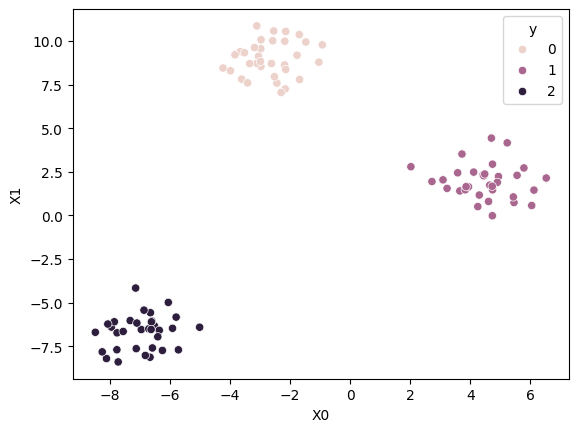

In [36]:
sns.scatterplot(data=data, x='X0', y='X1', hue='y')

/Users/saurabh/Documents/projects/KMeans-MakeBlob-Implementation/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([[ 0.86236563,  5.48955564],
       [-6.95170962, -6.67621669]])

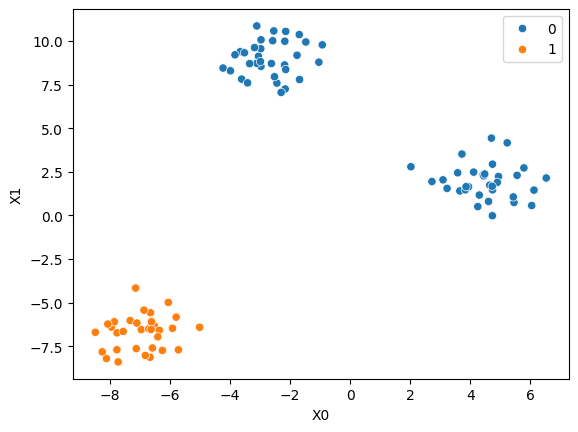

In [55]:
model = KMeans(n_clusters=2)
model.fit(X)
y_gen = model.labels_
sns.scatterplot(data=data, x='X0', y='X1', hue=y_gen)
model.cluster_centers_

In [ ]:
#PRE-DEFINED MODEL

<Axes: xlabel='X0', ylabel='X1'>

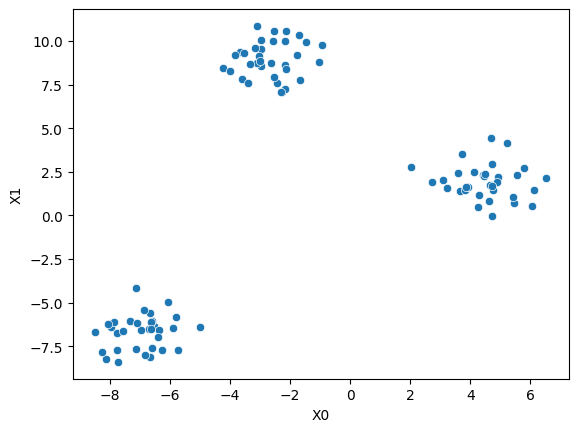

In [56]:
sns.scatterplot(data=data, x='X0', y='X1')

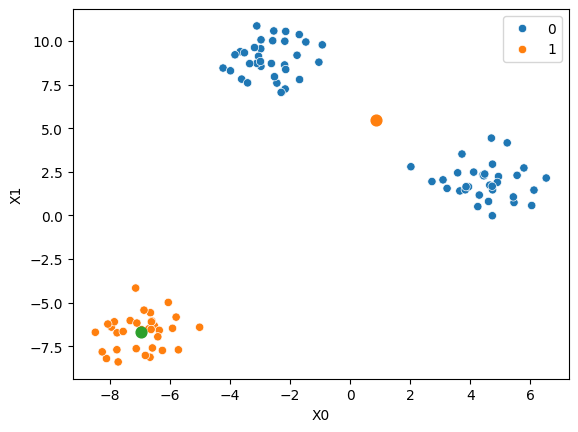

In [57]:
sns.scatterplot(data=data, x='X0', y='X1', hue=y_gen)

for center in model.cluster_centers_:
    plt.scatter(center[0], center[1], s=60)

In [58]:
#INSIDE KNN ALGO.

In [59]:
class Cluster:
    
    def __init__(self, center):
        self.center = center
        self.points = []
    
    def distance(self, point):
        return np.sqrt(np.sum((point - self.center) ** 2))
        

class CustomKMeans:
    
    def __init__(self, n_clusters=3, max_iters=20):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
    
    def fit(self, X):
        
        clusters = []
        for i in range(self.n_clusters):
            cluster = Cluster(center=random.choice(X))
            clusters.append(cluster)
            
        
        
        for i in range(self.max_iters):
            
            labels = []
        
            # going for each point
            for point in X:

                # collecting disctances form every cluster
                distances = []
                for cluster in clusters:
                    distances.append(cluster.distance(point))

                # finding closest cluster
                closest_idx = np.argmin(distances)
                closest_cluster = clusters[closest_idx]
                closest_cluster.points.append(point)
                labels.append(closest_idx)

            for cluster in clusters:
                cluster.center = np.mean(cluster.points, axis=0)
            
        self.labels_ = labels
        self.cluster_centers_ = [cluster.center for cluster in clusters]

<Axes: xlabel='X0', ylabel='X1'>

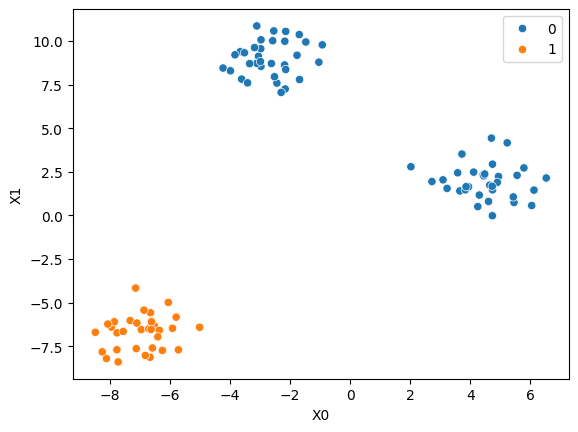

In [60]:
model = CustomKMeans(n_clusters=2)
model.fit(x)
y = model.labels_
sns.scatterplot(data=data, x='X0', y='X1', hue=model.labels_)